In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [2]:
data=pd.read_csv('car data.csv')#reading dataset

In [3]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
data.shape

(301, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
#checking missing values on each columns
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
#check distribution of categorical data using value_counts()
print(data.Seller_Type.value_counts(),data.Fuel_Type.value_counts(),data.Car_Name.value_counts())

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64 Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64 city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: Car_Name, Length: 98, dtype: int64


In [8]:
#Encoding the categorical data
#Encode Fuel_Type
data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

#Encode Seller_type
data.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

#Encode Transmission
data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [9]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [10]:
X=data.drop(['Selling_Price','Car_Name'],axis=1)
Y=data['Selling_Price']

In [11]:
print(X)#print(Y)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [12]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=2)

In [13]:
#loading the linreg model and train it
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [14]:
prediction=model.predict(X_train)#prediction on training data

In [15]:
#calculating r2 score for training data
score=metrics.r2_score(Y_train,prediction)
print(score)

0.8799451660493708


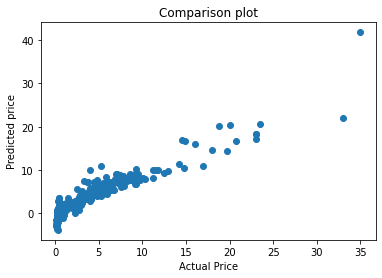

In [16]:
#plots
plt.scatter(Y_train,prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted price")
plt.title("Comparison plot")
plt.show()

In [17]:
pred_Test=model.predict(X_test)#prediction on testing data

In [18]:
#calculating r2 score for testing data
score_test=metrics.r2_score(Y_test,pred_Test)
print(score_test)

0.8365766715026374


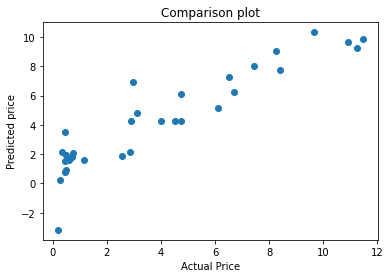

In [19]:
#plots
plt.scatter(Y_test,pred_Test)
plt.xlabel("Actual Price")
plt.ylabel("Predicted price")
plt.title("Comparison plot")
plt.show()

In [20]:
#load lasso model
Model=Lasso()

In [21]:
Model.fit(X_train,Y_train)

Lasso()

In [22]:
pred=Model.predict(X_train)

In [23]:
err_sc=metrics.r2_score(Y_train,pred)
print(err_sc)

0.8427856123435794


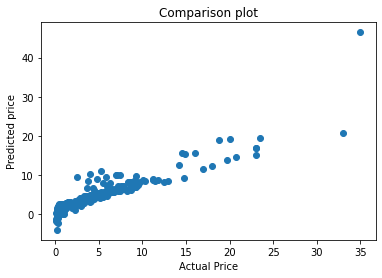

In [24]:
#plots
plt.scatter(Y_train,pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted price")
plt.title("Comparison plot")
plt.show()

In [25]:
test_pred=Model.predict(X_test)

In [27]:
sc_test=metrics.r2_score(Y_test,test_pred)
print(sc_test)

0.8709167941173195


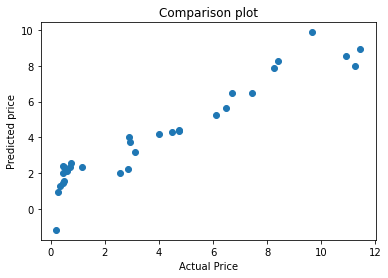

In [29]:
plt.scatter(Y_test,test_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted price")
plt.title("Comparison plot")
plt.show()

In [30]:
#pickling the above ml model
import pickle
with open('pickle_car.pkl','wb') as file:
    pickle.dump(model,file)


#for printing pickled models
#with open('pickle_car.pkl','rb') as file:
 #   demo=pickle.load(file)

#print(demo)

In [32]:
with open('pickle_car_1.pkl','wb') as file:
    pickle.dump(Model,file)



#for printing pickled models
#with open('pickle_car_1.pkl','rb') as file:
 #   demo=pickle.load(file)

#print(demo)